In [1]:
import pandas as pd
import numpy as np 
import os
import matplotlib.pyplot as plt 
import seaborn as sns 
import plotly.graph_objs as go
from plotly.offline import iplot
import plotly.express as px


In [2]:
file_data = r"D:\5.DataAnalysis\2\Project 4--_ Finance Data Analysis-20230402T013311Z-001\Project 4--_ Finance Data Analysis\Bank_Personal_Loan_Modelling.xlsx"
Bank_data=pd.read_excel(file_data,1)
Bank_data.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [3]:
Bank_data.isnull().sum()

ID                    0
Age                   0
Experience            0
Income                0
ZIP Code              0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal Loan         0
Securities Account    0
CD Account            0
Online                0
CreditCard            0
dtype: int64

In [4]:
Bank_data.shape

(5000, 14)

In [5]:
#Drop unnecessary columns
Bank_data.drop(['ID' , 'ZIP Code'] , axis = 1 , inplace=True)

In [7]:
Bank_data.head()

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,25,1,49,4,1.6,1,0,0,1,0,0,0
1,45,19,34,3,1.5,1,0,0,1,0,0,0
2,39,15,11,1,1.0,1,0,0,0,0,0,0
3,35,9,100,1,2.7,2,0,0,0,0,0,0
4,35,8,45,4,1.0,2,0,0,0,0,0,1


## 1-Provide a summary of the dataset using the five-number summary with visual distributions (such as box plots, histograms, or kernel density plots) of the data

In [9]:
stats_df = Bank_data[['Age', 'Experience', 'Income', 'Family', 'Education']]
stats_df.describe()

,Age,Experience,Income,Family,Education
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,45.338400,20.104600,73.774200,2.396400,1.881000
std,11.463166,11.467954,46.033729,1.147663,0.839869
min,23.000000,-3.000000,8.000000,1.000000,1.000000
25%,35.000000,10.000000,39.000000,1.000000,1.000000
50%,45.000000,20.000000,64.000000,2.000000,2.000000
75%,55.000000,30.000000,98.000000,3.000000,3.000000
max,67.000000,43.000000,224.000000,4.000000,3.000000


In [ ]:
#plotting using px 
fig = px.box(data_frame=Bank_data , y=['Age', 'Experience', 'Income', 'Family', 'Education'])
fig

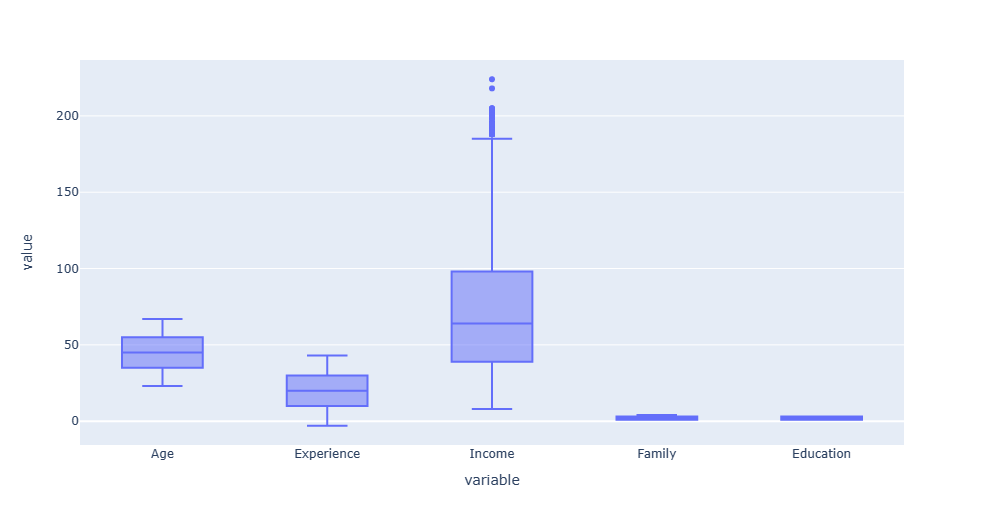

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002BF50AD0DF0>,
      dtype=object)

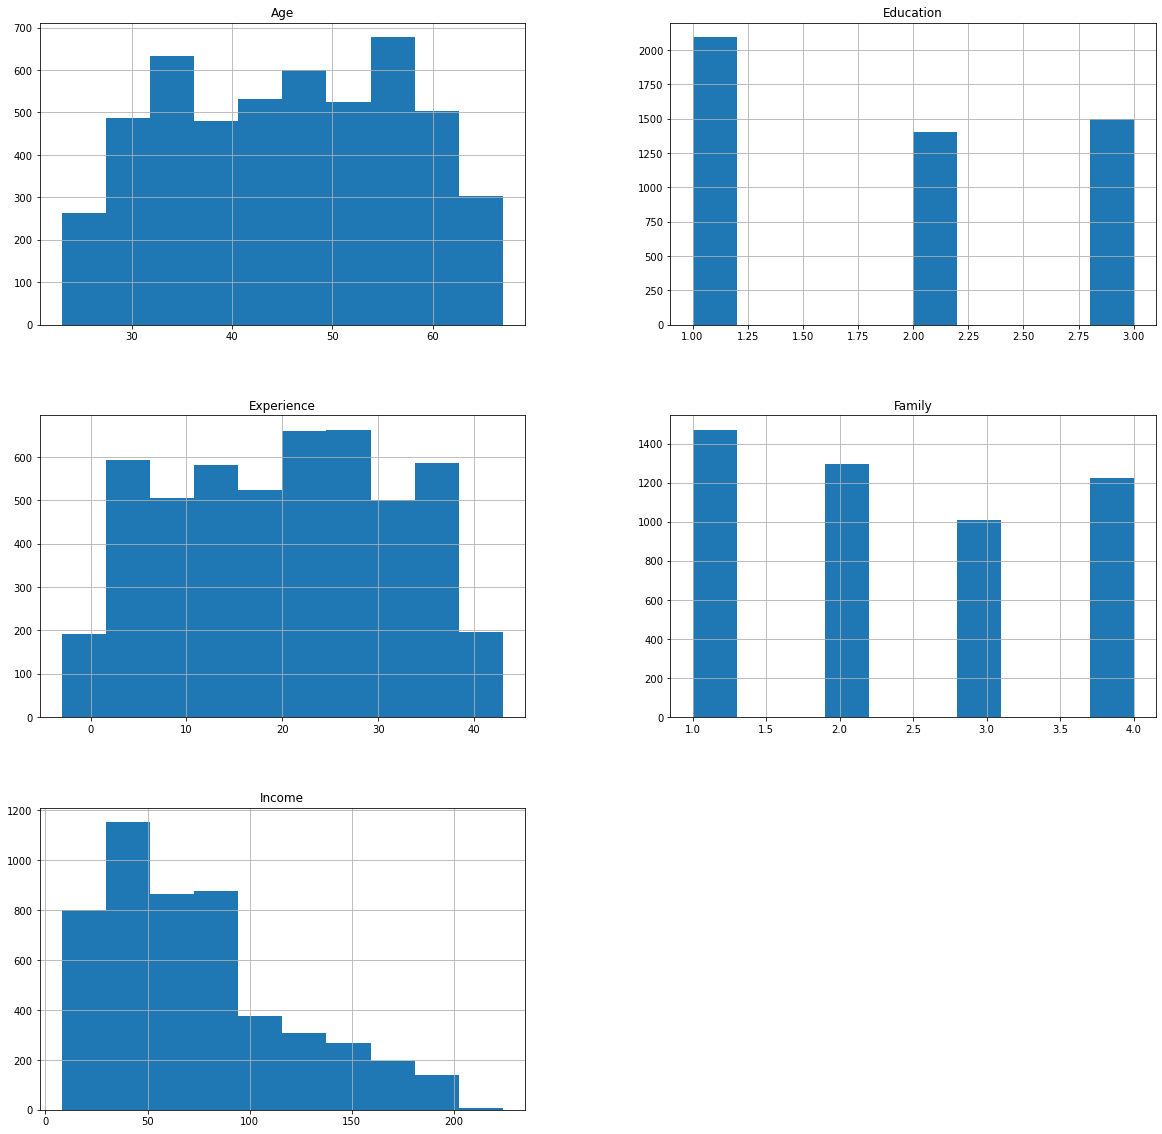

In [11]:
stats_df.hist(figsize=(20 , 20) )

In [ ]:
#From the analysis and the graphs, it is obvious that there are some negative values in the experience column
#This needs to be fixed by attaching the mean value of the experience instead of the negative ones
plt.figure(figsize=(14,8))
sns.distplot(Bank_data['Experience'])

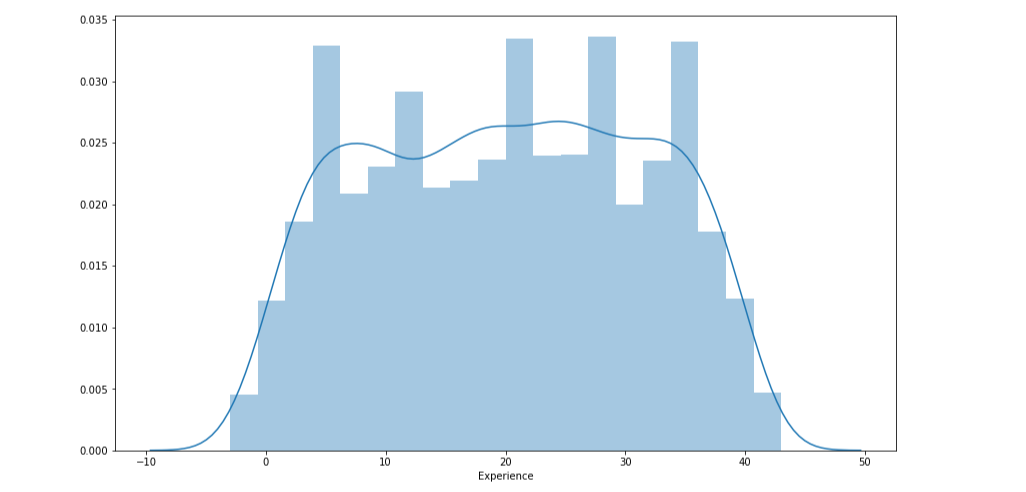

In [22]:
neg_exp=Bank_data[Bank_data['Experience']<0]
print('In this data we have {} negative experinces which will corrspond to {:.1f}% of the data'.format(neg_exp.size,neg_exp.size/Bank_data['Experience'].size * 100))

In this data we have 624 negative experinces which will corrspond to 12.5% of the data


In [24]:
#We can use np.where to replace the negative values with the mean of the data
np.where(Bank_data['Experience']<0,Bank_data['Experience'].mean(),Bank_data['Experience'])
Bank_data['Experience']= np.where(Bank_data['Experience']<0,Bank_data['Experience'].mean(),Bank_data['Experience'])

In [ ]:
plt.figure(figsize=(14,8))
sns.distplot(Bank_data['Experience'])

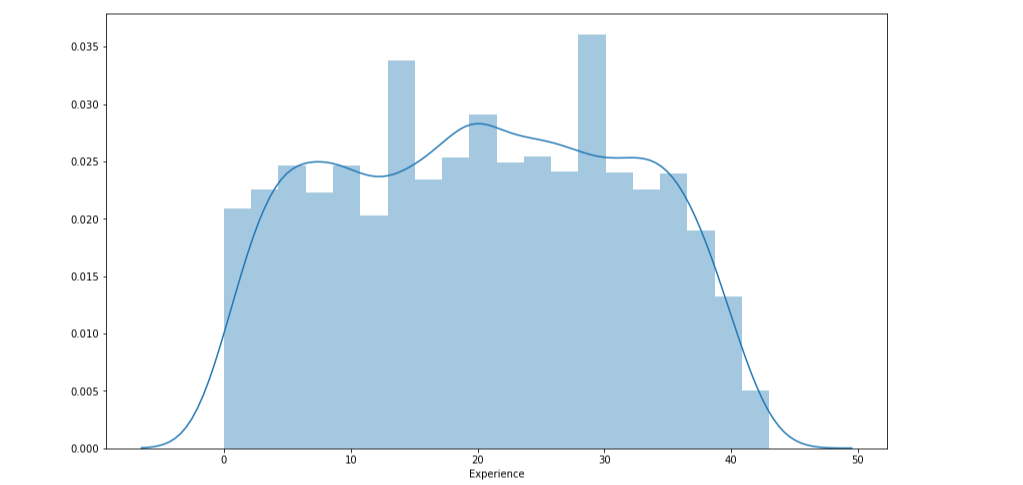

## 2- How strongly are the variables in the dataset related to one another?"

In [28]:
#To find the corelation between all the variables we can use the following method
Bank_data.corr()

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
Age,1.000000,0.977008,-0.055269,-0.046418,-0.052030,0.041334,-0.012539,-0.007726,-0.000436,0.008043,0.013702,0.007681
Experience,0.977008,1.000000,-0.049054,-0.045488,-0.048719,0.018097,-0.013378,-0.014045,-0.000462,0.005502,0.013455,0.008833
Income,-0.055269,-0.049054,1.000000,-0.157501,0.645993,-0.187524,0.206806,0.502462,-0.002616,0.169738,0.014206,-0.002385
Family,-0.046418,-0.045488,-0.157501,1.000000,-0.109285,0.064929,-0.020445,0.061367,0.019994,0.014110,0.010354,0.011588
CCAvg,-0.052030,-0.048719,0.645993,-0.109285,1.000000,-0.136138,0.109909,0.366891,0.015087,0.136537,-0.003620,-0.006686
Education,0.041334,0.018097,-0.187524,0.064929,-0.136138,1.000000,-0.033327,0.136722,-0.010812,0.013934,-0.015004,-0.011014
Mortgage,-0.012539,-0.013378,0.206806,-0.020445,0.109909,-0.033327,1.000000,0.142095,-0.005411,0.089311,-0.005995,-0.007231
Personal Loan,-0.007726,-0.014045,0.502462,0.061367,0.366891,0.136722,0.142095,1.000000,0.021954,0.316355,0.006278,0.002802
Securities Account,-0.000436,-0.000462,-0.002616,0.019994,0.015087,-0.010812,-0.005411,0.021954,1.000000,0.317034,0.012627,-0.015028
CD Account,0.008043,0.005502,0.169738,0.014110,0.136537,0.013934,0.089311,0.316355,0.317034,1.000000,0.175880,0.278644


In [ ]:
#for better representation we can use sns heatmaps
plt.figure(figsize=(14,8))
sns.heatmap(Bank_data.corr(), annot=True)

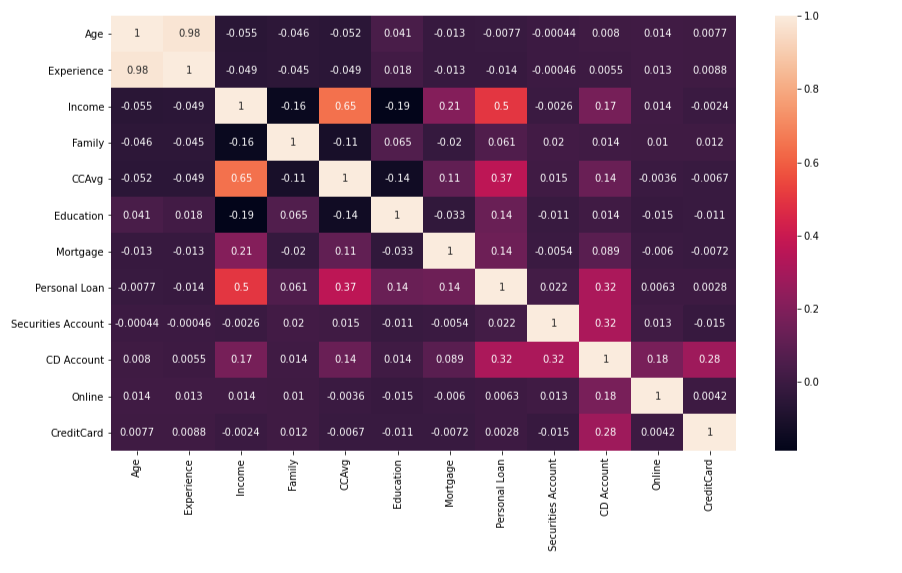

## 3-What insights can we gain from analyzing the education status of customers in the Bank data set?

In [32]:
Bank_data['Education'].unique()

array([1, 2, 3], dtype=int64)

In [34]:
#To create a new col with meaningful values on the Education level we can create the following funcion:
def mark(x):
    if x ==1:
        return 'Undergraduate'
    elif x ==2:
        return 'Graduate'
    else:
        return 'Professional'

In [35]:
Bank_data['Edu_mark']=Bank_data['Education'].apply(mark)
Bank_data

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard,Edu_mark
0,25,1.0,49,4,1.6,1,0,0,1,0,0,0,Undergraduate
1,45,19.0,34,3,1.5,1,0,0,1,0,0,0,Undergraduate
2,39,15.0,11,1,1.0,1,0,0,0,0,0,0,Undergraduate
3,35,9.0,100,1,2.7,2,0,0,0,0,0,0,Graduate
4,35,8.0,45,4,1.0,2,0,0,0,0,0,1,Graduate
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,29,3.0,40,1,1.9,3,0,0,0,0,1,0,Professional
4996,30,4.0,15,4,0.4,1,85,0,0,0,1,0,Undergraduate
4997,63,39.0,24,2,0.3,3,0,0,0,0,0,0,Professional
4998,65,40.0,49,3,0.5,2,0,0,0,0,1,0,Graduate


In [36]:
EDU_dis=Bank_data.groupby('Edu_mark')['Age'].size().reset_index(name='count')
EDU_dis

,Edu_mark,count
0,Graduate,1403
1,Professional,1501
2,Undergraduate,2096


In [ ]:
px.pie(data_frame=EDU_dis, names='Edu_mark' , values='count' , title='Education Level')

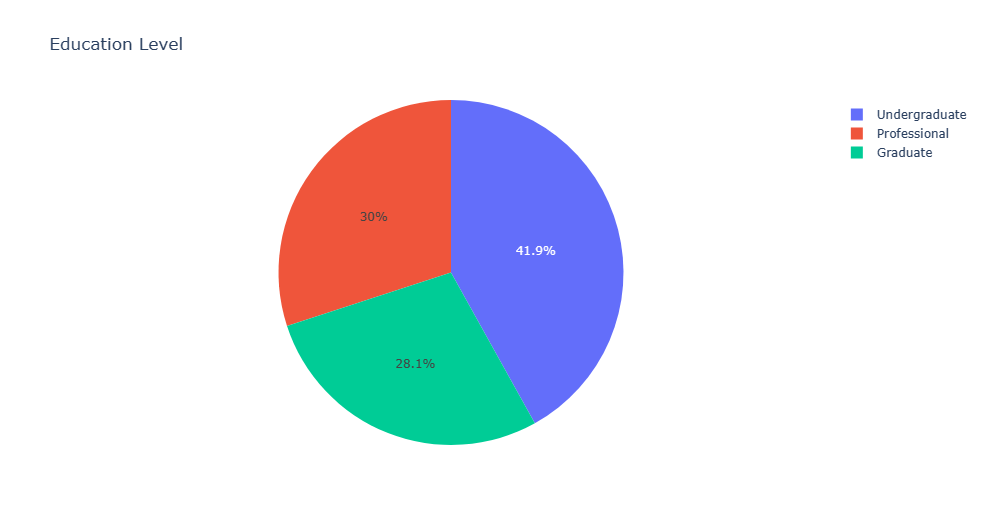

## 4-What are the different categories or types of account holders in the dataset, and what are their characteristics?

In [39]:
Bank_data.head()

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard,Edu_mark
0,25,1.0,49,4,1.6,1,0,0,1,0,0,0,Undergraduate
1,45,19.0,34,3,1.5,1,0,0,1,0,0,0,Undergraduate
2,39,15.0,11,1,1.0,1,0,0,0,0,0,0,Undergraduate
3,35,9.0,100,1,2.7,2,0,0,0,0,0,0,Graduate
4,35,8.0,45,4,1.0,2,0,0,0,0,0,1,Graduate


In [40]:
#New col representing Account_holder_Category can be created based on the Securities Account and Personal Loan 
#This can be done using a np.where or a functon with if statment, a np.where will be used

Bank_data['Account_holder_Category'] = np.where((Bank_data['Securities Account'] == 1) & (Bank_data['CD Account'] == 1),
                                        'Hold Securities and Deposits',
                        np.where((Bank_data['Securities Account'] == 0) & (Bank_data['CD Account'] == 0),
                                                 'Does not Hold Securities and Deposits',
                        np.where((Bank_data['Securities Account'] == 1) & (Bank_data['CD Account'] == 0),
                                                          'Hold Securities and No Deposits',
                                                          'Hold Deposits only')))


In [52]:
Bank_data['Account_holder_Category'].unique()

array(['Hold Securities and No Deposits',
       'Does not Hold Securities and Deposits', 'Hold Deposits only',
       'Hold Securities and Deposits'], dtype=object)

In [ ]:
px.pie(data_frame=Bank_data.groupby('Account_holder_Category').size().reset_index(name='count'),
       names='Account_holder_Category', values='count')

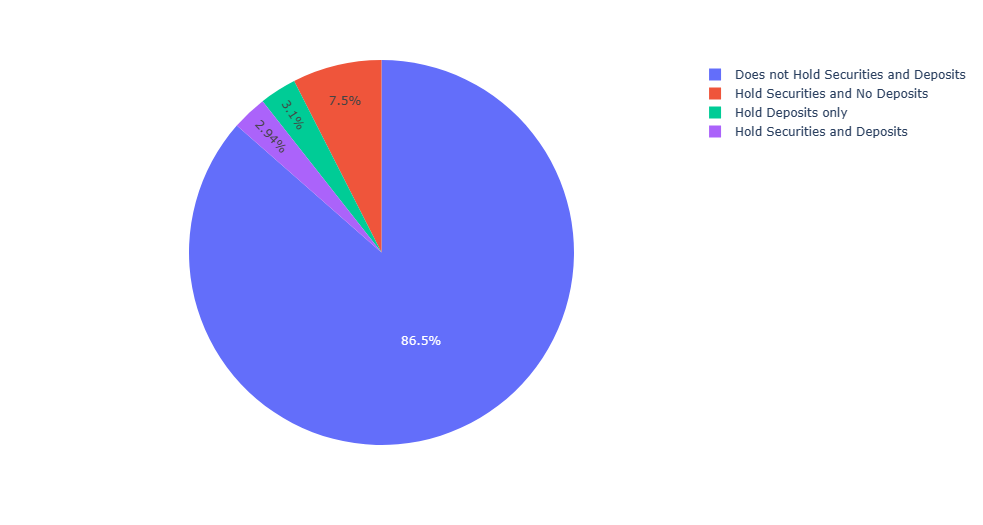

## 5-Does age play a role in determining the availability of loans, and can we examine the relationship between age and loan availability in the context of other variables in the dataset, such as income, education level, or account type

In [55]:
#Thsi could be approached using statistical analysis, such as a t-test or correlation analysis
#t-test will be used to determine if there is a significant relationship between age and loan availability.
#to use these statistical analysis we need to import scipy library as follows:
import scipy.stats as stats

In [ ]:
#first we can see how the scatter plot looks like
px.scatter(Bank_data[['Age', 'Personal Loan']] , x='Age', y= 'Personal Loan')

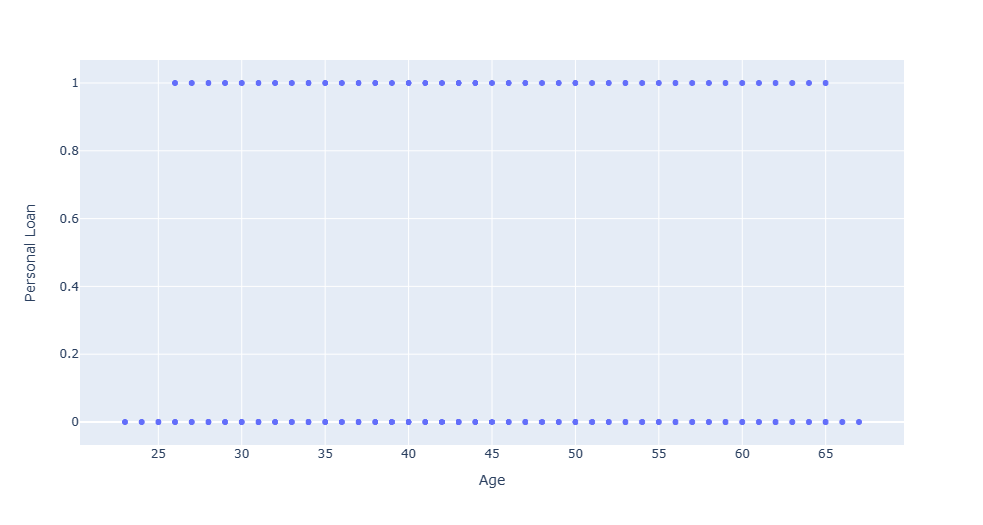

In [58]:
#The hypothesis as follows:
H0='Age has no impact on the personal loan'
H1='Age has impact on the personal loan'


In [60]:
#Creat numpy array for each situation
Age_PL0=np.array(Bank_data[Bank_data['Personal Loan']==0]['Age'])
Age_PL1=np.array(Bank_data[Bank_data['Personal Loan']==1]['Age'])

In [61]:
#Apply the ttest for the two arrays
t,p_value = stats.ttest_ind(Age_PL0,Age_PL1, axis=0)
if p_value<0.05:
    print(H1 + ' as the p value less than 0.05 with value of {:.2f}'.format(p_value))
else:
    print(H0 + ' as the p value greater than 0.05 with value of {:.2f}'.format(p_value))
    

Age has no impact on the personal loan as the p value greater than 0.05 with value of 0.58


In [62]:
#To better use this test with other values than th age, a function must be created 
def Hypothesis (df,parameter):
    arr1=np.array(df[df['Personal Loan']==0][parameter])
    arr2=np.array(df[df['Personal Loan']==1][parameter])
    t,p_value = stats.ttest_ind(arr1,arr2, axis=0)
    if p_value<0.05:
        print('The {} has impact on the personal loan as the p value less than 0.05 with value of {}'.format(parameter,p_value))
    else:
        print('The {} has no impact on the personal loan as the p value is greater than 0.05 with a value of {}'.format(parameter, p_value))

In [65]:
Hypothesis (Bank_data,'Age')

The Age has no impact on the personal loan as the p value is greater than 0.05 with a value of 0.584959263705325


In [67]:
Hypothesis (Bank_data,'Family')

The Family has impact on the personal loan as the p value less than 0.05 with value of 1.4099040685673807e-05


In [64]:
Hypothesis (Bank_data,'Experience')

The Experience has no impact on the personal loan as the p value is greater than 0.05 with a value of 0.3207536024015185


In [66]:
Hypothesis (Bank_data,'Education')

The Education has impact on the personal loan as the p value less than 0.05 with value of 2.70966319357669e-22
